In [1]:
# import libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

2024-06-23 08:43:49.685873: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 08:43:49.685983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 08:43:49.858502: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Overview

In [2]:
# read the data from the csv file
df = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')

In [3]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [5]:
df.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [7]:
# list unique values in columns
for column in df.columns:
    print(column)
    print(df[column].unique())


id
[    0     1     2 ... 76515 76516 76517]
Marital status
[1 2 4 3 5 6]
Application mode
[ 1 17 39 44  7 18 15 16 53 43 51 42 10  5 12 27  2 26  4 35  9  3]
Application order
[1 2 3 6 4 5 0 9]
Course
[9238 9254 9500  171 9085 9773 9003 9853 9147 9670 8014 9119 9991 9130
 9556 9070   33  979   39]
Daytime/evening attendance
[1 0]
Previous qualification
[ 1 19 39 40 12  3  2 42  4  9 11  6 15 38 10 43 14 37  5 36 17]
Previous qualification (grade)
[126.  125.  137.  131.  132.  133.1 130.  135.  120.  140.  154.  133.
 151.  122.  138.  145.  139.  110.  114.  129.  128.  150.  143.  117.
 161.  121.  141.  147.  134.  113.  160.  100.  136.  168.  108.  124.
 155.  118.  149.  156.  116.  115.  123.  142.  127.  146.  144.  109.
 152.  111.  175.  148.  107.  170.  119.  153.  180.  157.  158.  102.
 166.  106.  105.  162.  163.  118.9  95.  112.  176.  159.  119.1 126.6
 139.3  96.  101.  177.  140.8 172.  164.   99.  167.  169.  188.  165.
 173.  103.  148.8 119.3 162.9 140.6 138.6 

# Data Processing

In [8]:
# Encode the target variable
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

## Outliers

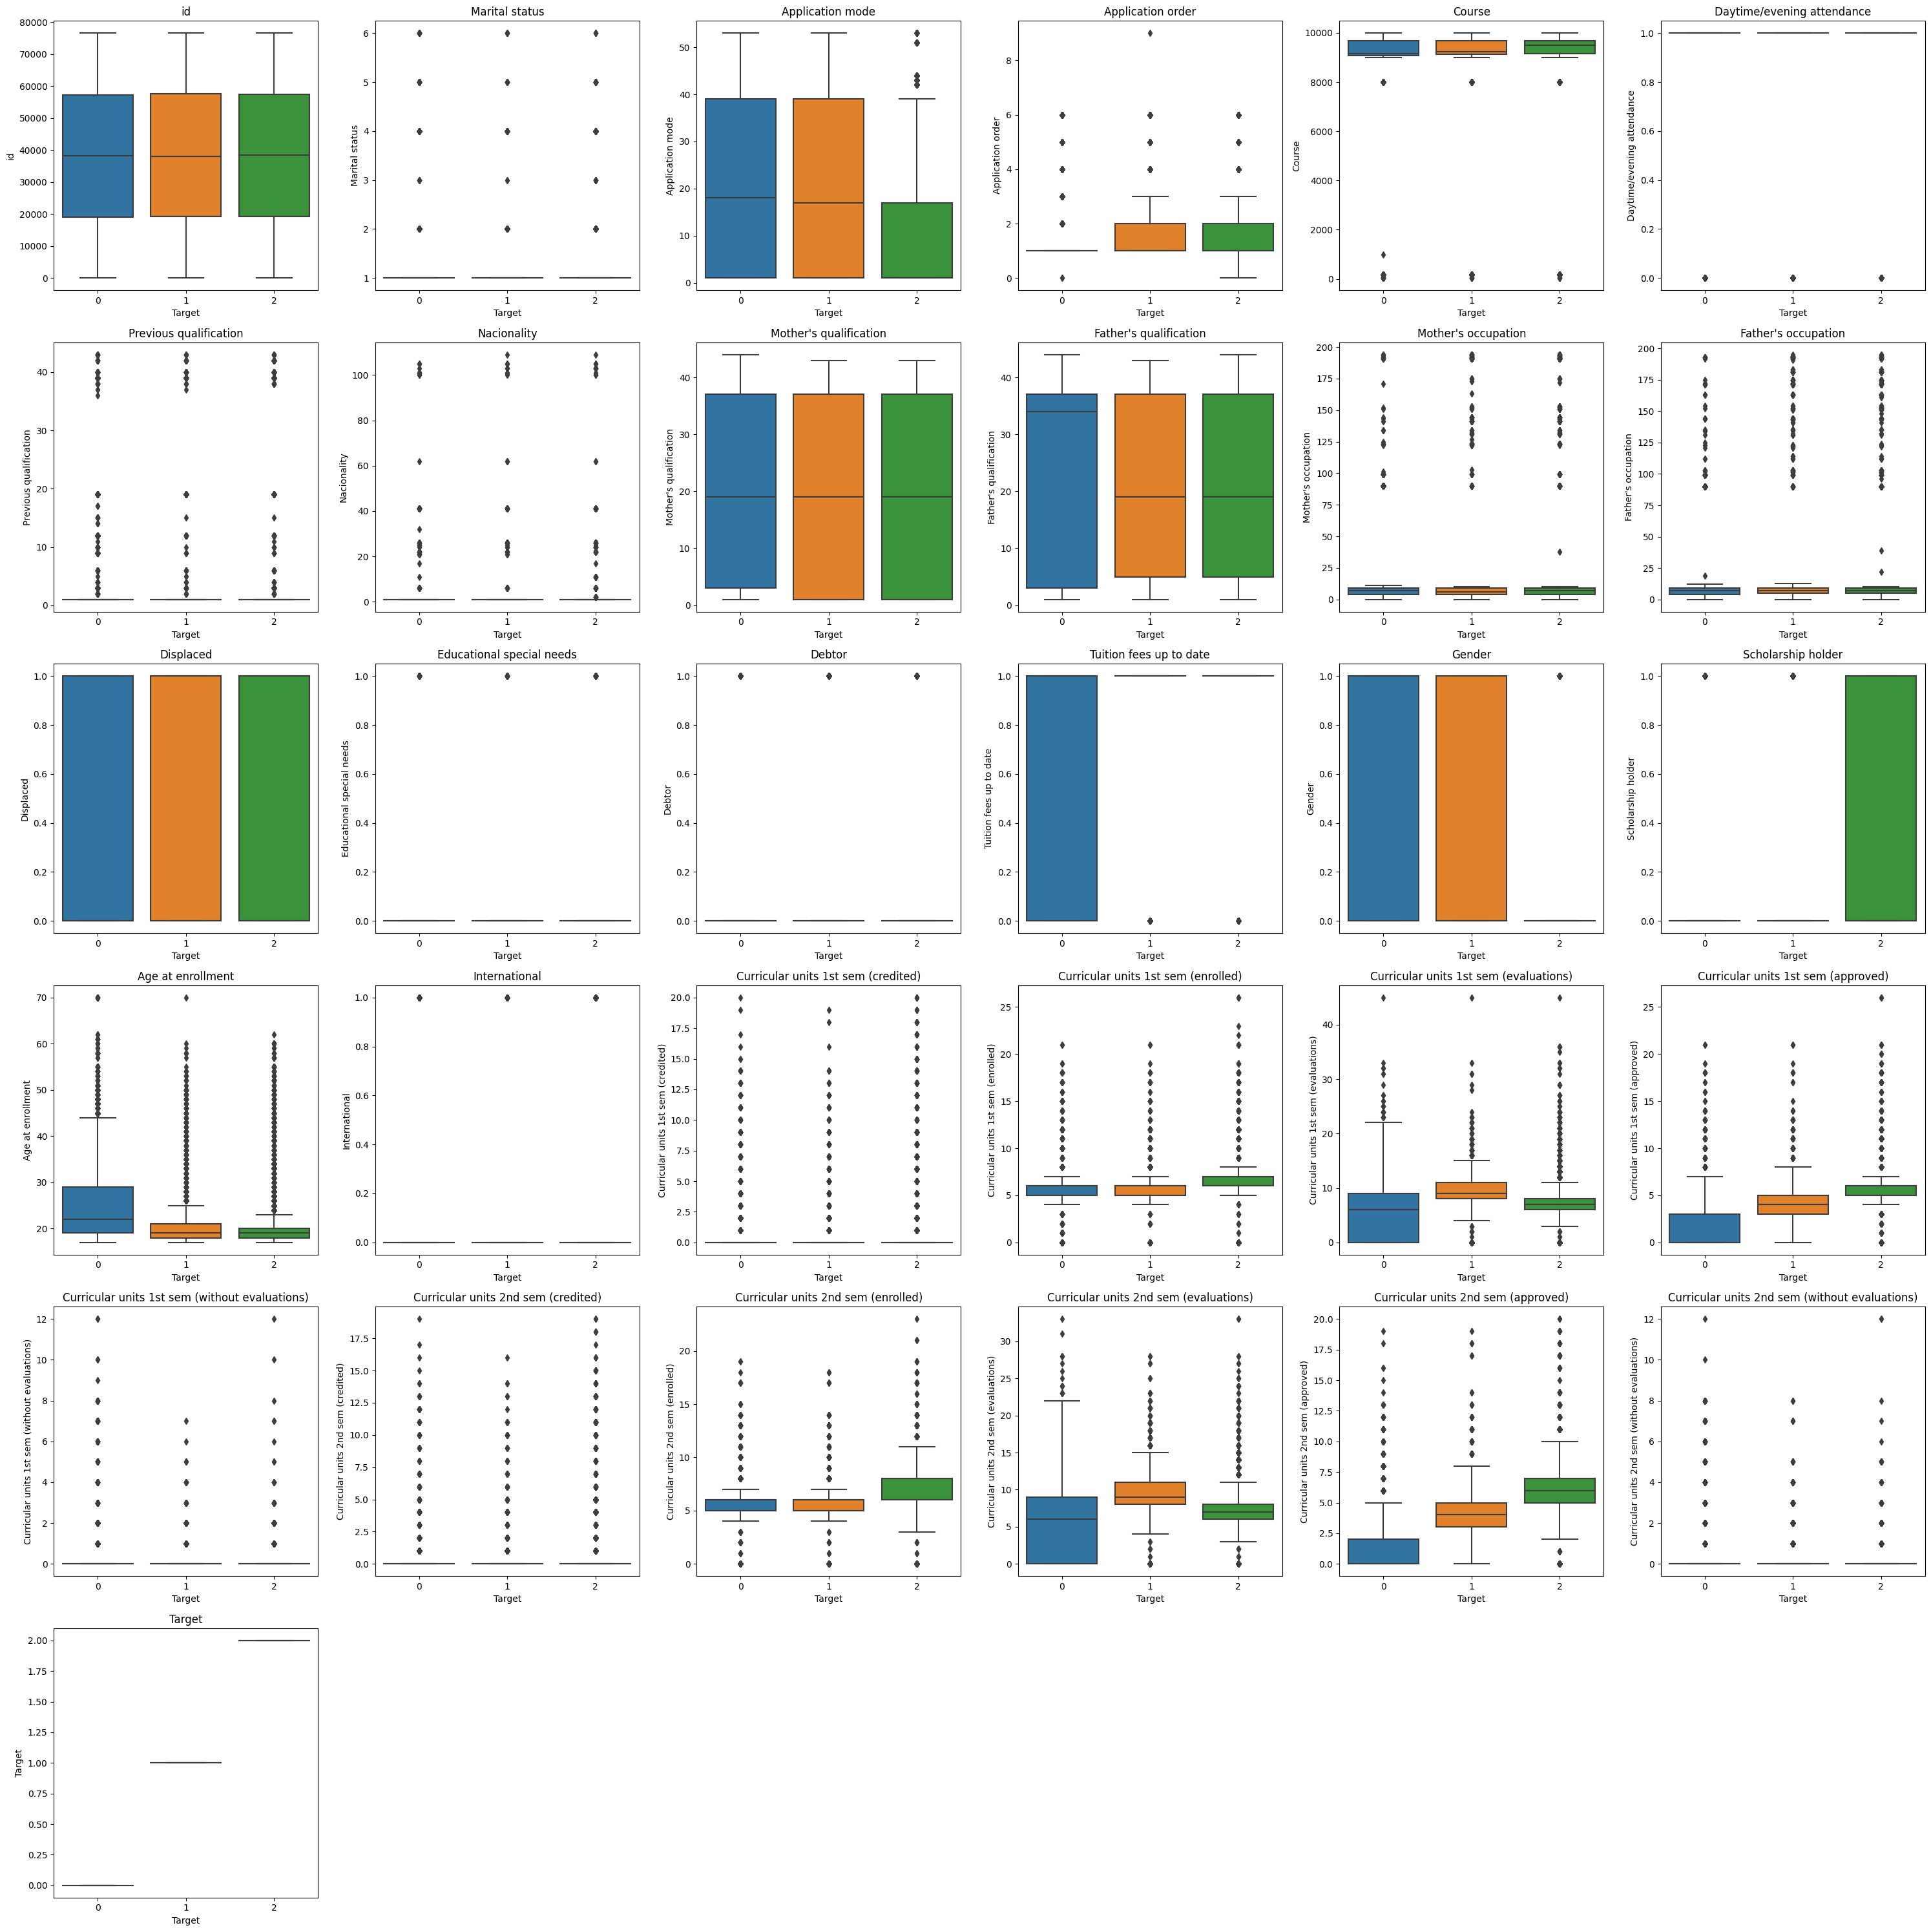

In [9]:
# Count the number of int64 columns
int_columns = [col for col in df.columns if df[col].dtype == 'int64']
n_int_columns = len(int_columns)

# Calculate the grid size for subplots (simple square root strategy for a square-ish layout)
grid_size = int(n_int_columns**0.5) + (1 if n_int_columns % int(n_int_columns**0.5) > 0 else 0)

# Create a figure and a set of subplots
fig, axs = plt.subplots(grid_size, grid_size, figsize=(30, 30))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through the integer columns and create a boxplot for each
for i, column in enumerate(int_columns):
    sns.boxplot(x='Target', y=column, data=df, ax=axs[i])
    axs[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

# Feature Analysis

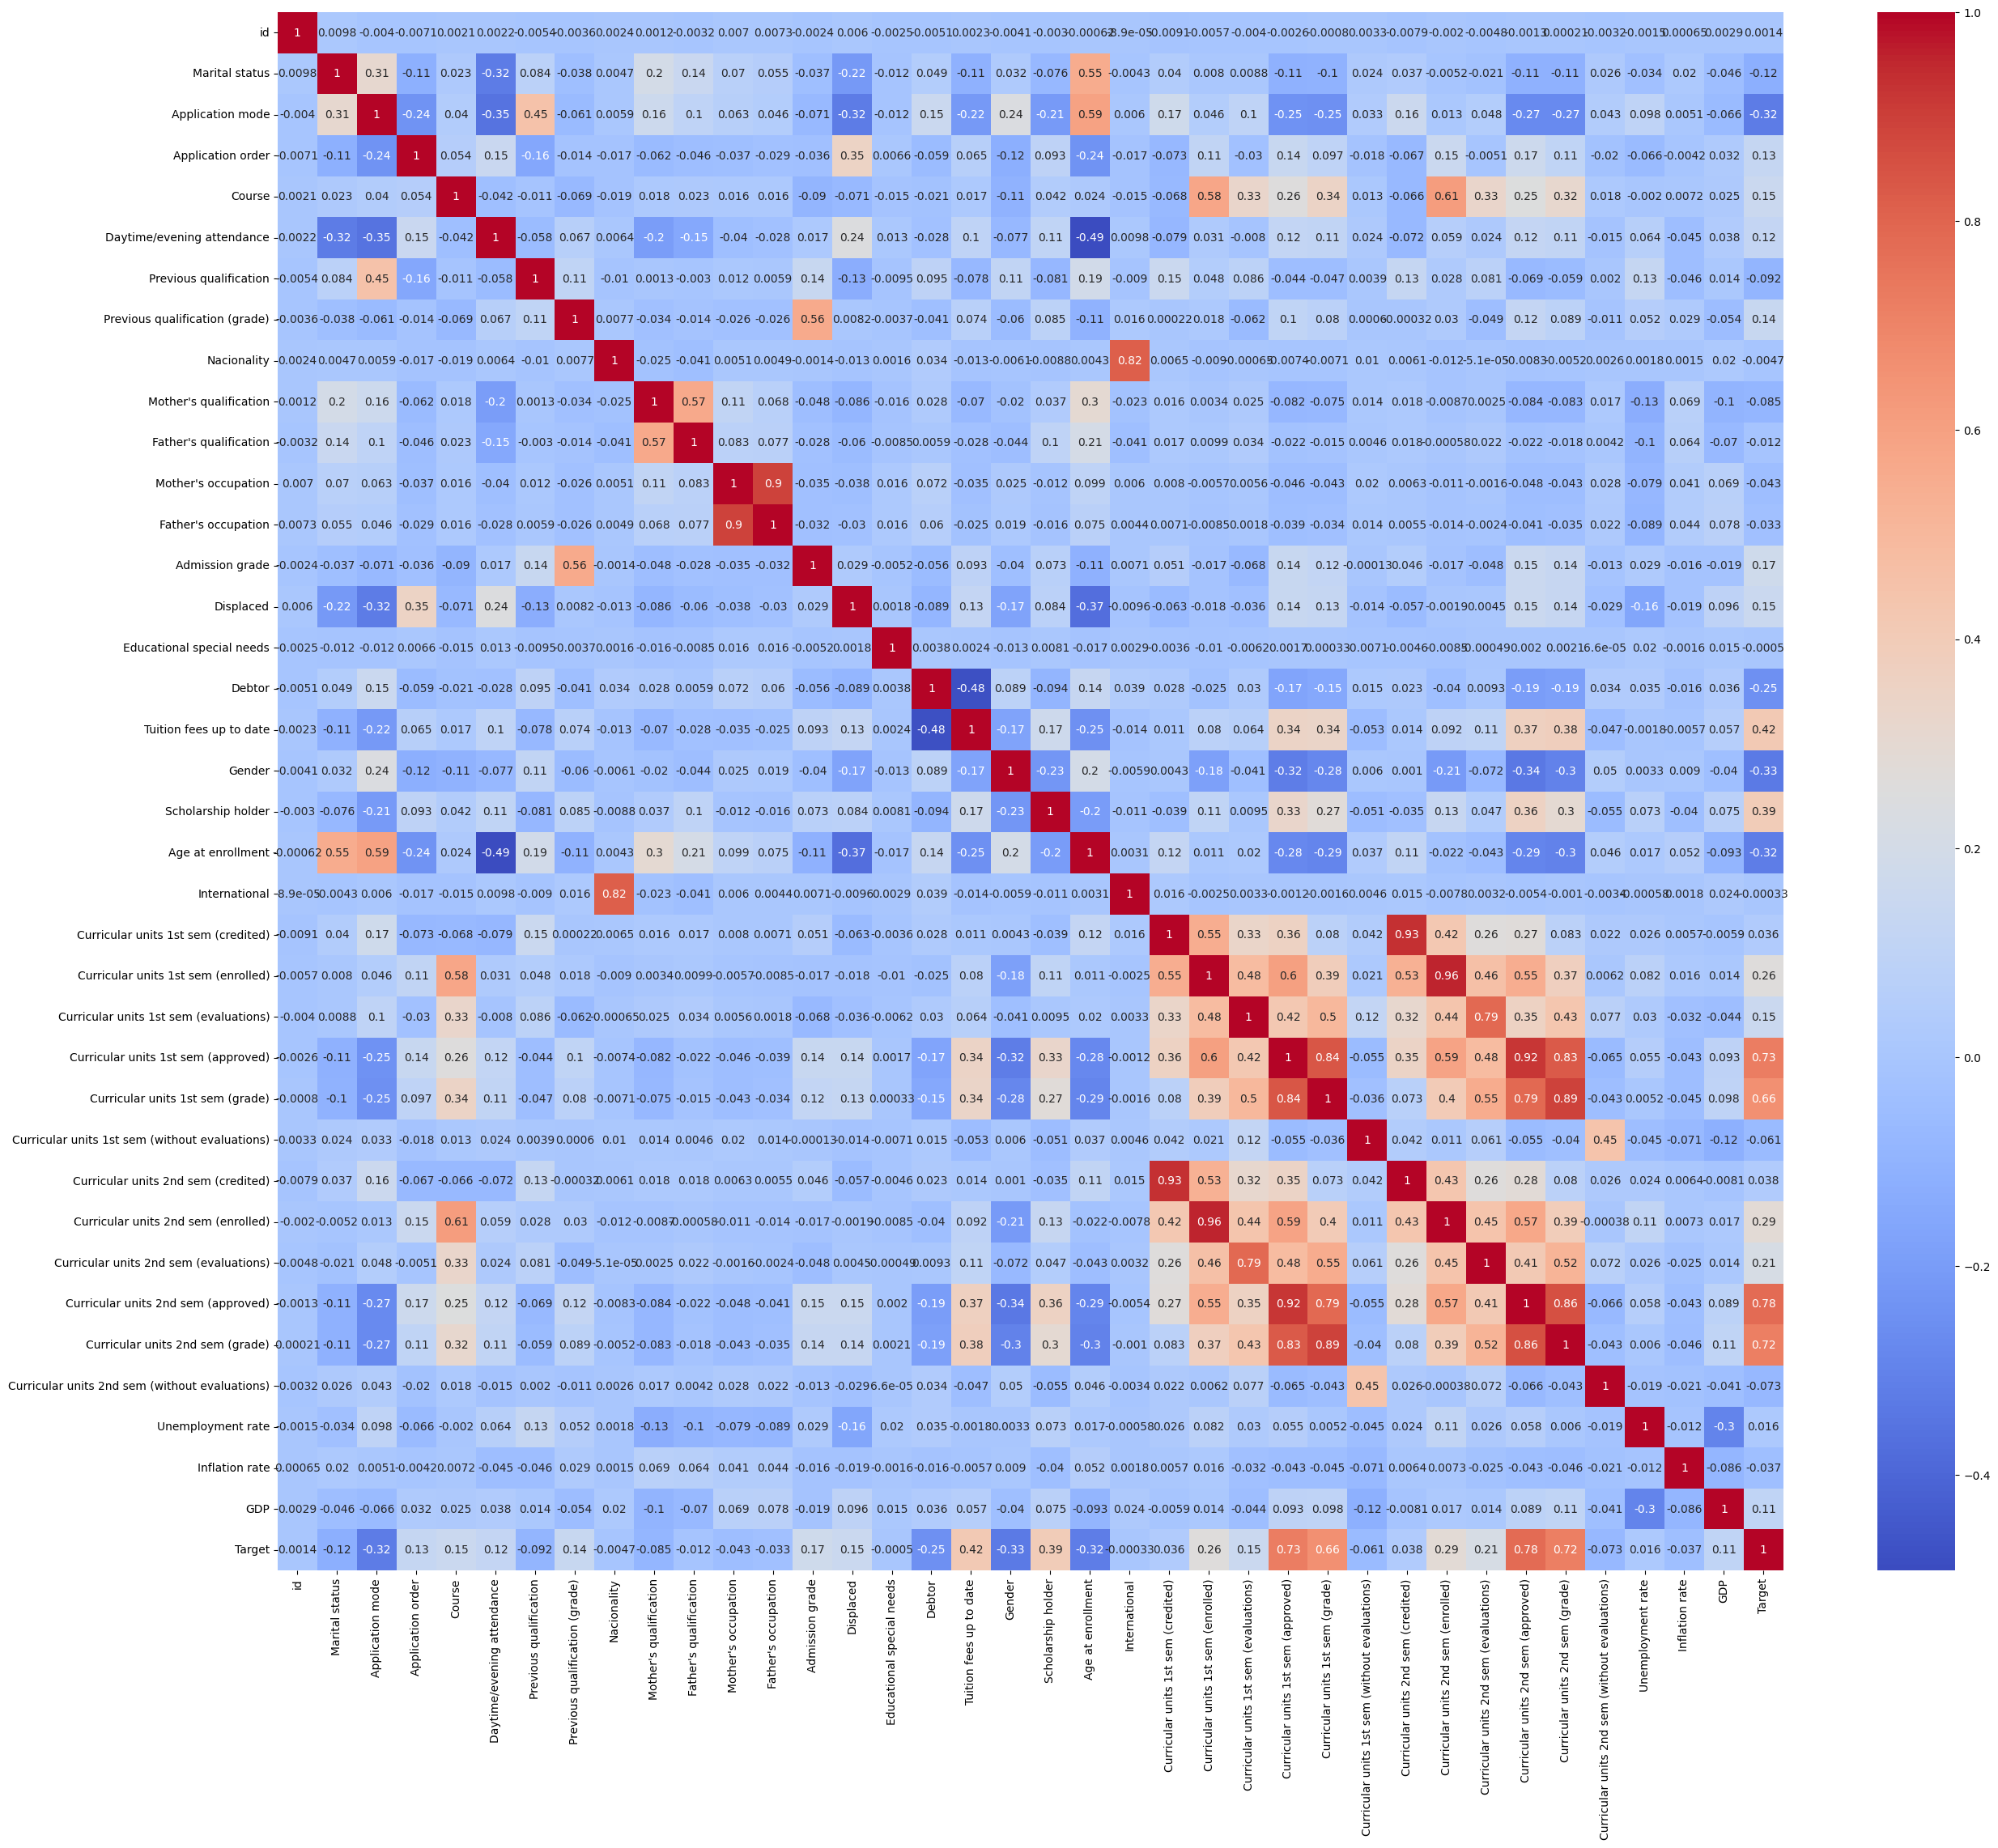

In [10]:
# correlation heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
# spit the data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# split the data into training, testing, and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# # normalize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a list of classification models
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=300)),
    ('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=300)),  # GBC
    ('AdaBoost', AdaBoostClassifier(algorithm='SAMME')),  # AdaBoost
    ('XGBoost_1', xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)),
    ('XGBoost_2', xgb.XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, gamma=1)),
    ('XGBoost_3', xgb.XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, gamma=1)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=300)),
    ('Bagging Classifier', BaggingClassifier(n_estimators=300)),
]

# Assuming X_train, y_train, X_test, and y_test are defined elsewhere in your code
# Evaluate each model in turn
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print("\n")


Random Forest:
Accuracy: 0.8291949817041296
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      5028
           1       0.65      0.60      0.62      3017
           2       0.85      0.93      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.78      0.79     15304
weighted avg       0.83      0.83      0.83     15304

Confusion Matrix:
 [[4164  550  314]
 [ 345 1811  861]
 [ 108  436 6715]]


Gradient Boosting Classifier:
Accuracy: 0.8331155253528489
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.87      5028
           1       0.66      0.62      0.64      3017
           2       0.86      0.92      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.80     15304
weighted avg       0.83      0.83      0.83     15304

Confusion M

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
# neural network models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
neural_networks = [
    ('Neural Network 1', keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])),
    ('Neural Network 2', keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])),
    ('Neural Network 3', keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])),
    ('Neural Network 4', keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])),
    ('Neural Network 5', keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])),
]


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# early stopping and reduce learning rate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(patience=10)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5)

In [17]:
for name, model in neural_networks:
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])


Epoch 1/100
 106/1531 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3843 - loss: 526.1124

I0000 00:00:1719132683.530981      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1531/1531 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4186 - loss: 124.0427 - val_accuracy: 0.2003 - val_loss: 91.6971 - learning_rate: 0.0010
Epoch 2/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5174 - loss: 31.0308 - val_accuracy: 0.6913 - val_loss: 9.4832 - learning_rate: 0.0010
Epoch 3/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5817 - loss: 17.8228 - val_accuracy: 0.4389 - val_loss: 18.3118 - learning_rate: 0.0010
Epoch 4/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6045 - loss: 12.9082 - val_accuracy: 0.5097 - val_loss: 9.4605 - learning_rate: 0.0010
Epoch 5/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6211 - loss: 10.0273 - val_accuracy: 0.4746 - val_loss: 7.5612 - learning_rate: 0.0010
Epoch 6/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6341 - loss: 8.0983 - val_accuracy: 0.7216 - val_loss: 3.8229 - learning_rate: 0.0010
Epoch 7/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6540 

In [18]:
for name, model in neural_networks:
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    
    print(f"{name}:")
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print("\n")

479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network 1:
Accuracy: 0.47464715107161526
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.00      0.00      5028
           1       0.00      0.00      0.00      3017
           2       0.47      1.00      0.64      7259

    accuracy                           0.47     15304
   macro avg       0.35      0.33      0.22     15304
weighted avg       0.42      0.47      0.31     15304

Confusion Matrix:
 [[  11    0 5017]
 [   2    0 3015]
 [   6    0 7253]]




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network 2:
Accuracy: 0.47432043910088867
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.00      0.00      5028
           1       0.00      0.00      0.00      3017
           2       0.47      1.00      0.64      7259

    accuracy                           0.47     15304
   macro avg       0.30      0.33      0.21     15304
weighted avg       0.37      0.47      0.31     15304

Confusion Matrix:
 [[   3    0 5025]
 [   1    0 3016]
 [   3    0 7256]]




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network 3:
Accuracy: 0.4750392054364872
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.00      0.01      5028
           1       0.00      0.00      0.00      3017
           2       0.47      1.00      0.64      7259

    accuracy                           0.48     15304
   macro avg       0.35      0.33      0.22     15304
weighted avg       0.42      0.48      0.31     15304

Confusion Matrix:
 [[  20    0 5008]
 [   5    0 3012]
 [   9    0 7250]]




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network 4:
Accuracy: 0.47438578149503396
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.00      0.00      5028
           1       0.00      0.00      0.00      3017
           2       0.47      1.00      0.64      7259

    accuracy                           0.47     15304
   macro avg       0.38      0.33      0.21     15304
weighted avg       0.44      0.47      0.31     15304

Confusion Matrix:
 [[   2    0 5026]
 [   0    0 3017]
 [   1    0 7258]]




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network 5:
Accuracy: 0.8007056978567695
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      5028
           1       0.57      0.53      0.55      3017
           2       0.84      0.92      0.88      7259

    accuracy                           0.80     15304
   macro avg       0.76      0.75      0.75     15304
weighted avg       0.80      0.80      0.80     15304

Confusion Matrix:
 [[4010  714  304]
 [ 473 1587  957]
 [ 122  480 6657]]




# Make predictions

In [19]:
# import data for predictions
df_test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [20]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Series([], dtype: int64)

# Ensemble Model

In [21]:
# Ensemble model
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=models, voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8325927861996864
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.87      5028
           1       0.66      0.61      0.63      3017
           2       0.85      0.93      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.80     15304
weighted avg       0.83      0.83      0.83     15304

Confusion Matrix:
 [[4187  518  323]
 [ 339 1836  842]
 [ 108  432 6719]]


In [22]:
# make predictions using the ensemble model
y_pred = ensemble_model.predict(df_test)

y_pred = pd.Series(y_pred).map({0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'})
y_pred

0         Dropout
1        Graduate
2        Graduate
3        Enrolled
4        Enrolled
           ...   
51007     Dropout
51008     Dropout
51009     Dropout
51010     Dropout
51011     Dropout
Length: 51012, dtype: object

In [23]:
df_submission = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
df_submission['Target'] = y_pred
df_submission = df_submission[['id', 'Target']]
df_submission.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


In [24]:
# save the dataframe as a csv file
df_submission.to_csv('submission.csv', index=False)